In [44]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [46]:
# MNIST 숫자 손글씨 Dataset 불러들이기

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.12.0
60000


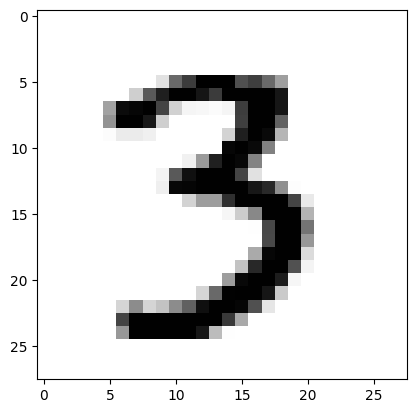

10001 번째 이미지의 숫자는 바로  3 입니다.


In [47]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [48]:
# 데이터 전처리 하기

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [49]:



# 가위,바위,보 이미지를 resize 하자.
# 사이저는 28 x 28로 하자

from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [50]:
pwd

'/content'

In [51]:
# 딥러닝 네트워크 설계하기

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (

In [52]:
# 딥러닝 네트워크 학습시키기

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [53]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2213 - accuracy: 0.9316
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0738 - accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0305 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0215 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.016

In [54]:
# 모델 평가하기
# 테스트 데이터로 성능을 확인해보기
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0355 - accuracy: 0.9886 - 745ms/epoch - 2ms/step
test_loss: 0.0354565866291523 
test_accuracy: 0.9886000156402588


313/313 [==============================] - 1s 2ms/step
model.predict() 결과 :  [8.0209950e-11 8.4989893e-10 2.4809009e-07 1.0254471e-06 1.0099523e-12
 5.9882745e-11 1.5053952e-13 9.9999869e-01 1.3031136e-10 2.3344464e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


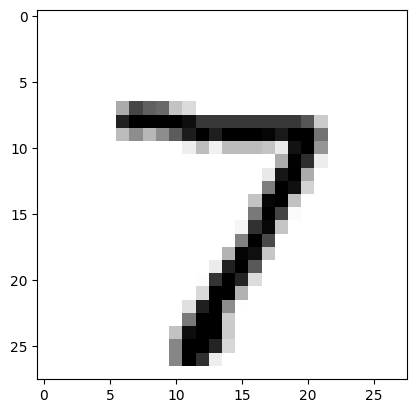

In [55]:
# 어떤 데이터를 잘못 추론했는지 확인해보기

predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0  # 1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

# 실제 데이터 확인
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.9377328e-13 6.1439139e-12 1.0437210e-14 1.9858398e-10 2.1059147e-01
 5.8073284e-09 1.4332743e-14 1.1593028e-06 5.1718674e-09 7.8940743e-01]
라벨: 4, 예측결과: 9


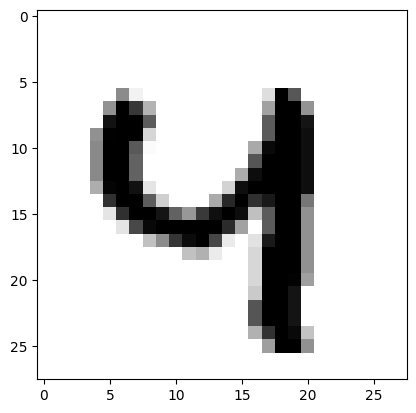

예측확률분포: [5.1049774e-05 2.0696429e-11 1.6561385e-08 1.1243815e-06 4.9256199e-09
 6.8267697e-04 9.9925929e-01 2.2894609e-12 5.8524693e-06 1.3893861e-08]
라벨: 5, 예측결과: 6


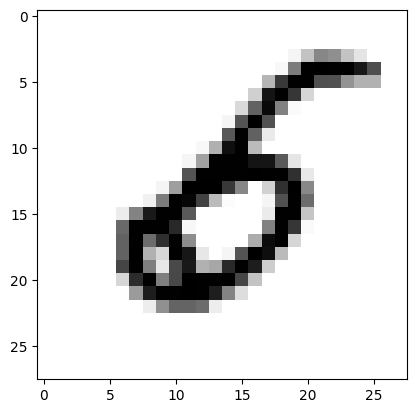

예측확률분포: [8.4842031e-04 7.8589106e-01 8.1299768e-06 2.0644708e-07 1.7418202e-03
 1.0597333e-03 2.0879512e-01 3.3433747e-04 1.2885354e-03 3.2709922e-05]
라벨: 6, 예측결과: 1


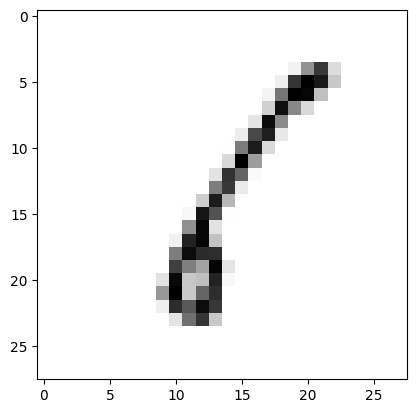

예측확률분포: [3.7706318e-13 3.0745859e-08 8.9148708e-02 1.3584573e-05 3.6477066e-09
 7.7825715e-12 9.2016076e-13 9.1082788e-01 9.7768216e-06 5.3707114e-09]
라벨: 2, 예측결과: 7


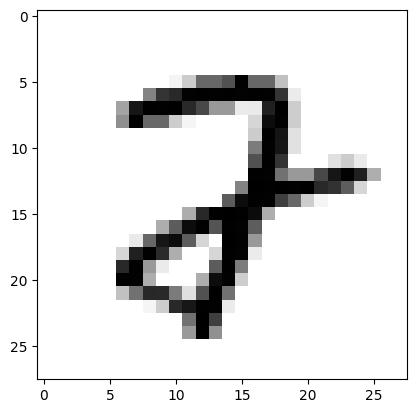

예측확률분포: [3.33242506e-01 1.06923038e-11 1.26042743e-09 4.82887896e-11
 1.03086016e-07 1.55489671e-03 6.65201962e-01 2.71528666e-09
 4.86848990e-07 5.09045339e-09]
라벨: 0, 예측결과: 6


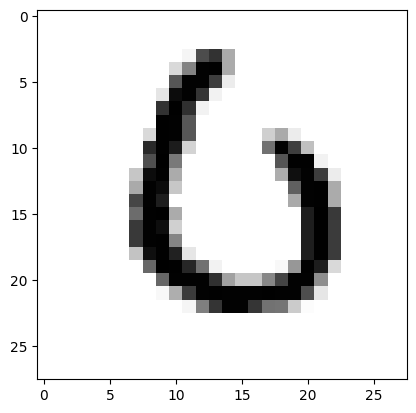

In [56]:
# 추론해낸 숫자와 실제 값이 다른 경우를 확인해보는 코드이다.

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [57]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

# 이미지 Resize 하기
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor"
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/scissors"

print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
PIL 라이브러리 import 완료!
이미지 디렉토리 경로:  /content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/scissors
가위 이미지 resize 완료!


In [66]:
# load_data 함수

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 402 입니다.
x_train shape: (3300, 28, 28, 3)
y_train shape: (3300,)


In [67]:
# train 데이터 리사이즈.

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/scissors"
#                 /content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/scissors

resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
print("path:"+image_dir_path)



# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/rock"
resize_images(image_dir_path)
# (x_train, y_train) = load_data(image_dir_path)

print("바위 이미지 resize 완료!")
print("path:"+image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
print("path:"+image_dir_path)

201  images to be resized.
201  images resized.
가위 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/scissors
201  images to be resized.
201  images resized.
바위 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/rock
201  images to be resized.
201  images resized.
보 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/train/paper


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

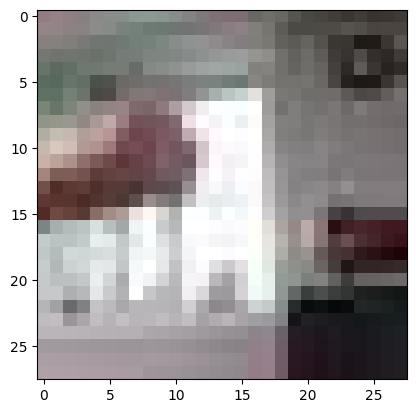

51 번째 이미지는 바로  1 입니다.


In [73]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=5

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])


index=50     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는 바로 ',  y_train[index], '입니다.')

In [74]:
# # 가위 : 0, 바위 : 1, 보 : 2 
# 위에서 바위 (1)에 대한 것은 일치.

In [75]:

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)



Epoch 1/10
104/104 [==============================] - 2s 5ms/step - loss: 1.3451 - accuracy: 0.9536
Epoch 2/10
104/104 [==============================] - 1s 6ms/step - loss: 0.0280 - accuracy: 0.9894
Epoch 3/10
104/104 [==============================] - 1s 5ms/step - loss: 0.0197 - accuracy: 0.9906
Epoch 4/10
104/104 [==============================] - 1s 5ms/step - loss: 0.0243 - accuracy: 0.9885
Epoch 5/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 6/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.9848
Epoch 7/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9930
Epoch 8/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0367 - accuracy: 0.9906
Epoch 9/10
104/104 [==============================] - 0s 4ms/step - loss: 0.1278 - accuracy: 0.9867
Epoch 10/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0293 - accuracy: 0.9912

In [76]:
# test 데이터도 resize 해주는 것 처리해주자.

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/scissors"

resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
print("path:"+image_dir_path)



# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")
print("path:"+image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
print("path:"+image_dir_path)



100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/scissors
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/rock
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
path:/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/paper


In [77]:
def load_data2(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels


image_dir_path = "/content/gdrive/MyDrive/aiffel/workplace/rock_scissor_paper/test/testdata1/"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [78]:
# Accuracy 축정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4465 - accuracy: 0.3467 - 153ms/epoch - 15ms/step
test_loss: 1.4465088844299316 
test_accuracy: 0.3466666638851166
